 Thanks to Jiashu She for sharing his solution

# ada-SGD algorithms
*In this lab, you will explore Adagrad, Adadelta, and Adam optimizers.

*For each task, you are provided with a code skeleton that you need to complete to implement and investigate the respective optimization algorithm.

# Task 1: Implement Adagrad
In this task, you will implement the Adagrad optimizer from scratch as a Python class, and call it to minimize the loss of classification by any simple NN and dataset, "recommended to have small NN and simple dataset to accelerate the running"


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [5]:
# Define the data preprocessing transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the image data
])

# Load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 107491884.91it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 62634795.15it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29453138.27it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5025198.83it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
# Task: make an adagrad optimizer
class AdagradOptimizer:
    def __init__(self, params, lr=0.01, eps=1e-6):
        self.params = params
        self.lr = lr
        self.eps = eps
        self.acc_grads = [np.zeros_like(param) for param in self.params]

    def step(self, grads):
        for i, (param, grad) in enumerate(zip(self.params, grads)):
            self.acc_grads[i] += np.square(grad)
            param -= self.lr * grad / (np.sqrt(self.acc_grads[i]) + self.eps)

    def zero_grad(self):
        for param in self.params:
            param.grad = np.zeros_like(param)




In [7]:
class TwoLayerNet(nn.Module):
    def __init__(self,input_size,output_size):
        super(TwoLayerNet, self).__init__()
        # TODO: Define the layers of your two-layer neural network
        self.fc1 = nn.Linear(input_size, 128)  # First fully connected layer
        self.fc2 = nn.Linear(128, output_size)  # Second fully connected layer

        pass

    def forward(self, x):
        # TODO: Implement the forward pass
        x = self.fc1(x)
        x = self.fc2(x)
        return x

net = TwoLayerNet(input_size=784, output_size=64)
criterion = nn.MSELoss()
optimizer = optim.Adagrad(net.parameters(), lr=0.01)  # Use Adagrad optimizer only to make sure your code is working


Epoch [1/1], Step [100/937], Loss: 0.0161
Epoch [1/1], Step [200/937], Loss: 0.0142
Epoch [1/1], Step [300/937], Loss: 0.0124
Epoch [1/1], Step [400/937], Loss: 0.0099
Epoch [1/1], Step [500/937], Loss: 0.0118
Epoch [1/1], Step [600/937], Loss: 0.0104
Epoch [1/1], Step [700/937], Loss: 0.0103
Epoch [1/1], Step [800/937], Loss: 0.0105
Epoch [1/1], Step [900/937], Loss: 0.0095


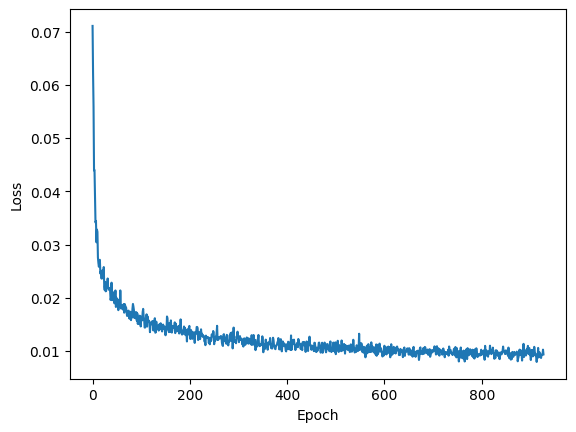

In [8]:
net = TwoLayerNet(input_size=784, output_size=64)
criterion = nn.MSELoss()
optimizer = optim.Adagrad(net.parameters(), lr=0.01)

# use my adagradOptimizer to train the model and plot the loss curve
losses = []
for epoch in range(1):
    for i, (images, labels) in enumerate(trainloader):
        images = images.view(-1, 28 * 28)
        labels = torch.zeros((len(labels), 64)).scatter_(1, labels.unsqueeze(1), 1)
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        losses.append(loss.item())
        loss.backward()
        optimizer.step()
        if (i + 1) % 100 == 0:
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' % (epoch + 1, 1, i + 1, len(trainset) // 64, loss.item()))
#plot the loss curve without zero point
losses_for_adagrad = losses[10:]
plt.plot(losses_for_adagrad)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


# Task 2: Implement Adadelta

In this task instead of adagrad which uses all the past gradient to estimate the variance of the gradients, small window of past gradient are used only. However, instead of using the squared gradient, we encourage you to propose another idea to have adaptive step size propotional to the curvature (inversly), remember the main idea of adagrad and adadelta is to update the model weights differently (adaptively) along every dimension based on the curvature of the loss.

<ipython-input-9-1598f19f842a>:24: UserWarning: This overload of addcmul_ is deprecated:
	addcmul_(Number value, Tensor tensor1, Tensor tensor2)
Consider using one of the following signatures instead:
	addcmul_(Tensor tensor1, Tensor tensor2, *, Number value) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1485.)
  square_avg.mul_(rho).addcmul_(1 - rho, grad, grad)


Epoch [1/1], Step [100/937], Loss: 0.0362
Epoch [1/1], Step [200/937], Loss: 0.0318
Epoch [1/1], Step [300/937], Loss: 0.0282
Epoch [1/1], Step [400/937], Loss: 0.0255
Epoch [1/1], Step [500/937], Loss: 0.0261
Epoch [1/1], Step [600/937], Loss: 0.0231
Epoch [1/1], Step [700/937], Loss: 0.0224
Epoch [1/1], Step [800/937], Loss: 0.0226
Epoch [1/1], Step [900/937], Loss: 0.0228


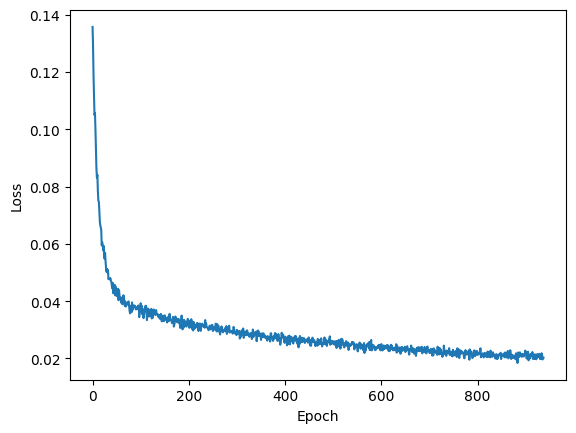

In [9]:
# Task: Implement the Adadelta optimizer from scratch with new G
class AdadeltaOptimizer(torch.optim.Optimizer):
    def __init__(self, params, lr=1.0, rho=0.9, eps=1e-6):
        defaults = dict(lr=lr, rho=rho, eps=eps)
        super(AdadeltaOptimizer, self).__init__(params, defaults)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()
        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                state = self.state[p]
                if len(state) == 0:
                    state['step'] = 0
                    state['square_avg'] = torch.zeros_like(p.data)
                    state['acc_delta'] = torch.zeros_like(p.data)
                square_avg, acc_delta = state['square_avg'], state['acc_delta']
                rho, eps = group['rho'], group['eps']
                state['step'] += 1
                square_avg.mul_(rho).addcmul_(1 - rho, grad, grad)
                std = acc_delta.add(eps).sqrt_().div_(square_avg.add(eps).sqrt_())
                delta = grad.mul(std)
                p.data.add_(-group['lr'], delta)
                acc_delta.mul_(rho).addcmul_(1 - rho, delta, delta)
        return loss

# Task: Train the model with your Adadelta optimizer
net = TwoLayerNet(input_size=784, output_size=64)
criterion = nn.MSELoss()
optimizer = AdadeltaOptimizer(net.parameters(), lr=0.01)  # Use Adadelta optimizer only to make sure your code is working
# train the model and plot the loss curve
losses_for_adadelta = []
for epoch in range(1):
    for i, (images, labels) in enumerate(trainloader):
        images = images.view(-1, 28 * 28)
        labels = torch.zeros((len(labels), 64)).scatter_(1, labels.unsqueeze(1), 1)
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        losses_for_adadelta.append(loss.item())
        loss.backward()
        optimizer.step()
        if (i + 1) % 100 == 0:
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' % (epoch + 1, 1, i + 1, len(trainset) // 64, loss.item()))
#plot the loss curve
plt.plot(losses_for_adadelta)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



# Task 3: Implement Adam

Compare the ||momentum vector - full gradient || with || stochastic gradient - full gradient|| . And then change the norm to weighted Euclidean norm with weight from Adam (scaling vector)

Epoch [1/1], Step [100/937], Loss: 0.0113
Epoch [1/1], Step [200/937], Loss: 0.0068
Epoch [1/1], Step [300/937], Loss: 0.0080
Epoch [1/1], Step [400/937], Loss: 0.0084
Epoch [1/1], Step [500/937], Loss: 0.0072
Epoch [1/1], Step [600/937], Loss: 0.0089
Epoch [1/1], Step [700/937], Loss: 0.0093
Epoch [1/1], Step [800/937], Loss: 0.0088
Epoch [1/1], Step [900/937], Loss: 0.0086


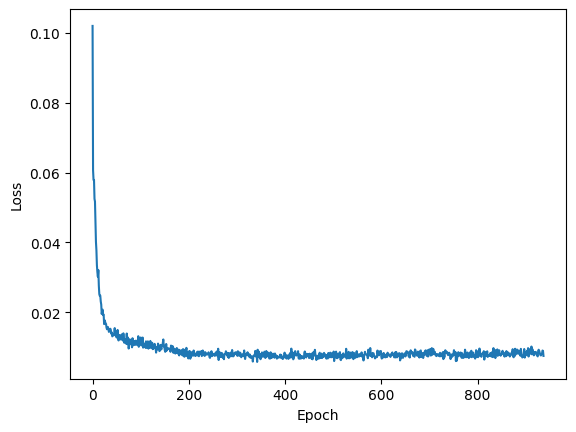

In [12]:
# Implement Adam optimizer from scratch
class AdamOptimizer(torch.optim.Optimizer):
    def __init__(self, params, lr=0.001, betas=(0.9, 0.999), eps=1e-8):
        defaults = dict(lr=lr, betas=betas, eps=eps)
        super(AdamOptimizer, self).__init__(params, defaults)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()
        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                state = self.state[p]
                if len(state) == 0:
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(p.data)
                    state['exp_avg_sq'] = torch.zeros_like(p.data)
                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2, eps = group['betas'][0], group['betas'][1], group['eps']
                state['step'] += 1
                exp_avg.mul_(beta1).add_(1 - beta1, grad)
                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                denom = exp_avg_sq.sqrt().add_(eps)
                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']
                step_size = group['lr'] * bias_correction2 / bias_correction1
                p.data.addcdiv_(-step_size, exp_avg, denom)
        return loss
#use my adamOptimizer to train the model and plot the loss curve
net = TwoLayerNet(input_size=784, output_size=64)
criterion = nn.MSELoss()
optimizer = AdamOptimizer(net.parameters(), lr=0.01)  # Use Adam optimizer only to make sure your code is working
# train the model and plot the loss curve
losses_for_adam = []
for epoch in range(1):
    for i, (images, labels) in enumerate(trainloader):
        images = images.view(-1, 28 * 28)
        labels = torch.zeros((len(labels), 64)).scatter_(1, labels.unsqueeze(1), 1)
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        losses_for_adam.append(loss.item())
        loss.backward()
        optimizer.step()
        if (i + 1) % 100 == 0:
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' % (epoch + 1, 1, i + 1, len(trainset) // 64, loss.item()))
#plot the loss curve
plt.plot(losses_for_adam)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [14]:
import numpy as np
# Generate some example data
np.random.seed(0)
X = 2 * np.random.rand(100, 3)
y = 4 + np.dot(X, np.array([3, 5, 2])) + np.random.randn(100)

# Parameters
params = np.random.randn(3)
lr = 0.1
momentum = 0.9
batch_size = 10

# Compute full gradient
full_gradient = -2/len(y) * X.T.dot(y - X.dot(params))

# Compute stochastic gradient (for one mini-batch)
idx = np.random.randint(0, len(y), batch_size)
X_batch, y_batch = X[idx], y[idx]
stochastic_gradient = -2/len(y_batch) * X_batch.T.dot(y_batch - X_batch.dot(params))

# Compute momentum vector
velocity = np.zeros_like(params)
velocity = momentum * velocity - lr * stochastic_gradient

# Compute norms
norm_momentum_full_gradient = np.linalg.norm(velocity - full_gradient)
norm_stochastic_full_gradient = np.linalg.norm(stochastic_gradient - full_gradient)

print("||Momentum Vector - Full Gradient||: ", norm_momentum_full_gradient)
print("||Stochastic Gradient - Full Gradient||: ", norm_stochastic_full_gradient)


||Momentum Vector - Full Gradient||:  50.966855882455064
||Stochastic Gradient - Full Gradient||:  10.485158378670791


# Task4: Investigating Optimization accuracy and complexity
* compare and plot the learning curves (testing-training loss vs. time) for all three optimizers to observe the differences.
* Show how the distribution of weights change over different layers, by a histogram


Epoch [1/1], Step [100/937], Loss: 0.0377
Epoch [1/1], Step [200/937], Loss: 0.0330
Epoch [1/1], Step [300/937], Loss: 0.0269
Epoch [1/1], Step [400/937], Loss: 0.0263
Epoch [1/1], Step [500/937], Loss: 0.0248
Epoch [1/1], Step [600/937], Loss: 0.0224
Epoch [1/1], Step [700/937], Loss: 0.0212
Epoch [1/1], Step [800/937], Loss: 0.0210
Epoch [1/1], Step [900/937], Loss: 0.0204


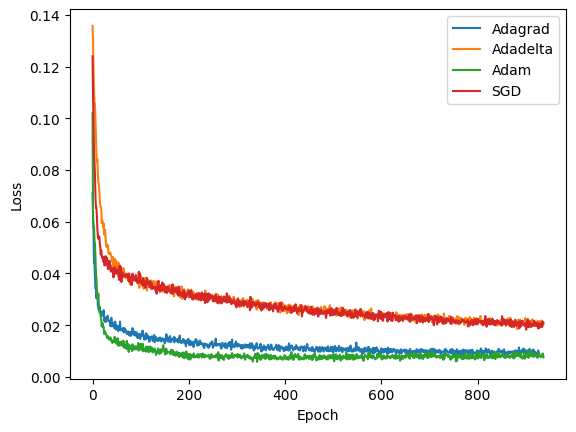

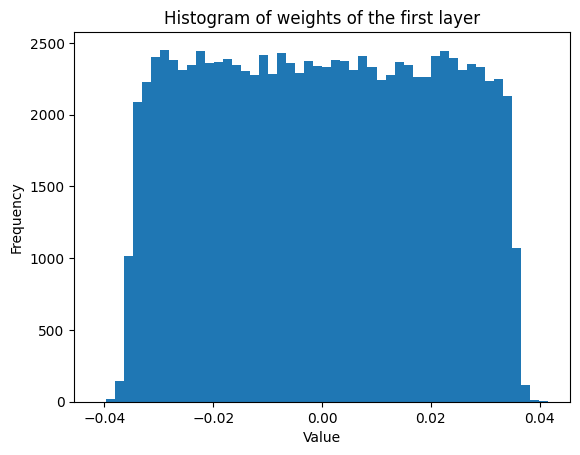

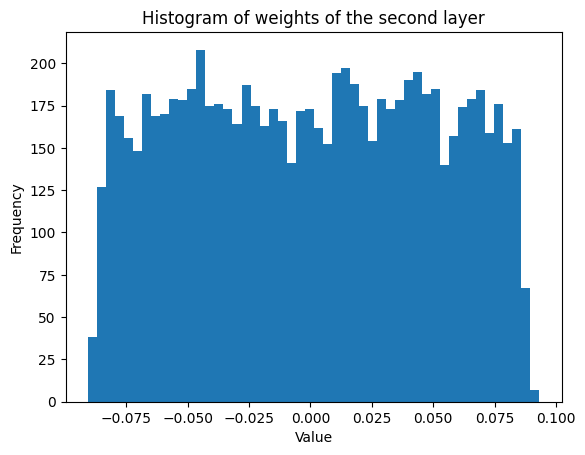

In [15]:
#use sgd to train the model
net = TwoLayerNet(input_size=784, output_size=64)
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)  # Use SGD optimizer only to make sure your code is working
# train the model and plot the loss curve
losses_for_sgd = []
for epoch in range(1):
    for i, (images, labels) in enumerate(trainloader):
        images = images.view(-1, 28 * 28)
        labels = torch.zeros((len(labels), 64)).scatter_(1, labels.unsqueeze(1), 1)
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        losses_for_sgd.append(loss.item())
        loss.backward()
        optimizer.step()
        if (i + 1) % 100 == 0:
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' % (epoch + 1, 1, i + 1, len(trainset) // 64, loss.item()))
#plot the four optimizer's loss curve
plt.plot(losses_for_adagrad, label='Adagrad')
plt.plot(losses_for_adadelta, label='Adadelta')
plt.plot(losses_for_adam, label='Adam')
plt.plot(losses_for_sgd, label='SGD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Show how the distribution of weights change over different layers, by a histogram of the weights
# Task: Plot the histogram of the weights of the first layer and second layer

plt.hist(net.fc1.weight.data.numpy().flatten(), bins=50)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of weights of the first layer')
plt.show()
plt.hist(net.fc2.weight.data.numpy().flatten(), bins=50)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of weights of the second layer')
plt.show()

